# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Computer Infrastructure  
**Lecturer:** [Ian McLoughlin](https://github.com/ianmcloughlin)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: FAANG Stock Data Analysis with yfinance  
This notebook demonstrates how to download, store, and visualize [FAANG](https://www.investopedia.com/terms/f/faang-stocks.asp) stock data using Python and the yfinance package. It also shows how to structure a reusable function and automate plotting for further analysis.

---

## 🔹Problem 1 – Data from yfinance

---

### - Requirements:

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

---

### - Overview of the Solution:  

The following steps show how to import the necessary libraries, download hourly FAANG stock data for the past five days using the yfinance package, and save it to a timestamped CSV file inside the `data` folder.

In [1]:
# Import libraries

# Data Frames
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Files and folders
import os

Exploring the yfinance package. Official documentation available [here](https://ranaroussi.github.io/yfinance/).

In [2]:
# List of FAANG tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

In [3]:
# Download FAANG stocks data and assign it to a dataframe:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
df.head(3) # show the first 3 rows

/tmp/ipykernel_9469/1249406616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  

[3 rows x 25 columns]

### - The `Data` Directory:  
This step uses Python’s built-in `os` module to create a folder named `data`. This directory will store the CSV files downloaded from Yahoo Finance. The `os.makedirs()` function is used with the `exist_ok=True` argument to ensure the folder is created if it doesn’t already exist, avoiding any errors if it’s run multiple times.

In [4]:
# Import the os module and create 'data' folder if it doesn't exist
# Reference: https://docs.python.org/3/library/os.html
# Reference: OpenAI
import os

os.makedirs("data", exist_ok=True)

### - Dates and Times:   
To create unique filenames, a timestamp is generated using Python’s `datetime` module [(reference: official documentation)](https://docs.python.org/3/library/datetime.html). This guarantees that each dataset is saved with a distinctive and descriptive name.

In [5]:
# Get the current date and time using the datetime module
now = dt.datetime.now()

# Display the current date and time
now

datetime.datetime(2025, 12, 20, 20, 16, 33, 585088)

In [6]:
# Format the current date and time as a string: YYYYMMDD-HHmmss
# This format will be used in the filename
# Reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
now.strftime("%Y%m%d-%H%M%S")

'20251220-201633'

In [7]:
# Create a unique filename that includes the timestamp
# The file will be saved inside the 'data' folder as a CSV file
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
print(filename)

data/20251220-201633.csv


In [8]:
# Save the downloaded dataframe (df) to the CSV file
# This will store the FAANG stock data in the 'data' folder
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv(filename)

### - Complete Function: `get_data()`    

Below is the final version of the `get_data()` function that combines all the steps demonstrated earlier. This function downloads hourly stock data for the five FAANG companies for the previous five days, creates a timestamped filename using the `datetime` module, saves the dataset as a CSV file inside the `data` folder, and ensures that the folder exists before saving.

In [9]:
# Script of the `get_data()` function:

def get_data():
    # References: 
    # https://www.w3schools.com/python/python_functions.asp
    # https://docs.python.org/3/tutorial/controlflow.html#defining-functions
    # https://www.w3schools.com/python/python_functions.asp
    # https://www.geeksforgeeks.org/python/python-def-keyword/
    # OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
    
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
  
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

# Example usage
df = get_data()
df.head(3)

/tmp/ipykernel_9469/1329689539.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Data saved to data/20251220-201633.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  

[3 rows x 25 columns]

---

## 🔹Problem 2: Plotting Data  

---

### - Requirements:  

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

---

### - Finding the Latest CSV File  

To work with the most recent dataset, we retrieve all filenames from the `data` folder using Python’s `os.listdir` function. Since each CSV file is saved with a timestamp in its filename, we simply sort the list in reverse order and select the first entry. This gives the newest file without needing to check creation times.

In [10]:
# List and sort files
# Ref: https://docs.python.org/3/library/os.html#os.listdir
files = os.listdir("data/")

In [11]:
# Sort files in reverse order (newest first)
# Ref: https://docs.python.org/3/library/stdtypes.html#list.sort
files.sort(reverse=True)

In [12]:
# Latest file (newest timestamp)
latest = files[0]

In [13]:
# Get the full path of the latest file
# Ref: https://docs.python.org/3/library/os.path.html#os.path.join
full_path = os.path.join("data", latest)

# Checking the latest file path
print(f"Using latest file: {full_path}")

Using latest file: data/20251220-201633.csv


### - Reading the most recent CSV file into a DataFrame  

Once the latest CSV file has been identified, it is loaded into a pandas DataFrame using the `read_csv` function. The file contains a two-level header, so both header rows are specified when reading the data. The first column is set as the index, and date parsing is enabled to ensure the index is treated as a datetime object. This allows the data to be analysed and manipulated more easily in later steps.  

In [14]:
# Calling pd.read_csv to read and check the latest CSV file
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv(full_path)
df.head(5)

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-15 14:30:00+00:00,274.1449890136719,223.02999877929688,307.7300109863281,641.0549926757812,94.00499725341797,280.04998779296875,227.5,311.3599853515625,649.6500244140625,...,280.0,227.0,310.625,644.25,96.0,8113962,6475168,3980818,2264723,5610795
3,2025-12-15 15:30:00+00:00,275.510009765625,224.38999938964844,308.8299865722656,650.5451049804688,94.43000030517578,275.6404113769531,224.38999938964844,309.3900146484375,650.760009765625,...,274.1700134277344,223.0399932861328,307.7300109863281,640.9299926757812,94.00499725341797,3495538,2713407,1244270,1317447,2675928
4,2025-12-15 16:30:00+00:00,274.9200134277344,222.5449981689453,306.1426086425781,650.3099975585938,94.0,275.69500732421875,224.5,308.8800048828125,651.3900146484375,...,275.5400085449219,224.44000244140625,308.8399963378906,650.6199951171875,94.43000030517578,2136284,2914110,1951626,846923,2181275


The columns and index need to be set correctly while reading the CSV file. Using the following parameters from the `read.csv` function to handle issues:  

- `header=[0, 1]` sets the first two rows of the file as column headers.  

- `index_col=0` sets the first column as the index.

- `parse_dates=True` converts the index to datetime format.


In [15]:
# Final read_csv with proper parameters 
df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

# Display the index to verify datetime conversion
df.index

DatetimeIndex(['2025-12-15 14:30:00+00:00', '2025-12-15 15:30:00+00:00',
               '2025-12-15 16:30:00+00:00', '2025-12-15 17:30:00+00:00',
               '2025-12-15 18:30:00+00:00', '2025-12-15 19:30:00+00:00',
               '2025-12-15 20:30:00+00:00', '2025-12-16 14:30:00+00:00',
               '2025-12-16 15:30:00+00:00', '2025-12-16 16:30:00+00:00',
               '2025-12-16 17:30:00+00:00', '2025-12-16 18:30:00+00:00',
               '2025-12-16 19:30:00+00:00', '2025-12-16 20:30:00+00:00',
               '2025-12-17 14:30:00+00:00', '2025-12-17 15:30:00+00:00',
               '2025-12-17 16:30:00+00:00', '2025-12-17 17:30:00+00:00',
               '2025-12-17 18:30:00+00:00', '2025-12-17 19:30:00+00:00',
               '2025-12-17 20:30:00+00:00', '2025-12-18 14:30:00+00:00',
               '2025-12-18 15:30:00+00:00', '2025-12-18 16:30:00+00:00',
               '2025-12-18 17:30:00+00:00', '2025-12-18 18:30:00+00:00',
               '2025-12-18 19:30:00+00:00', '2025-1

### - Selecting and previewing the Close column  

In this step, the `Close` column is extracted from the DataFrame and stored in a new variable called `close_df`. This creates a Series containing only the closing prices from the dataset. The `head(3)` function is then used to display the first three values, allowing a quick check that the data has been selected correctly.  

In [16]:
# Select only the 'Close' price column from the DataFrame
close_df = df['Close']

# Display the first 3 rows of the 'Close' prices
print(close_df.head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Ticker                          NFLX  
Datetime                              
2025-12-15 14:30:00+00:00  94.004997  
2025-12-15 15:30:00+00:00  94.430000  
2025-12-15 16:30:00+00:00  94.000000  


### - Visualizing FAANG Stock Prices  

In this section, we visualize the closing prices (`Close`) for the five FAANG companies using the most recent dataset saved in the `data` folder. The plots below demonstrate how to use pandas’ built-in plotting functions to easily visualize stock price trends.

Finally, we combine these steps into a function called `plot_data()` that automatically opens the latest CSV file, plots all FAANG `Close` prices, and saves the chart as a timestamped `.png` file inside the `plots` folder.  

- Exploring, Testing and Preparing the Data  

The following commands show how to inspect and plot data directly from the DataFrame before building the complete plotting function.

<Axes: xlabel='Datetime'>

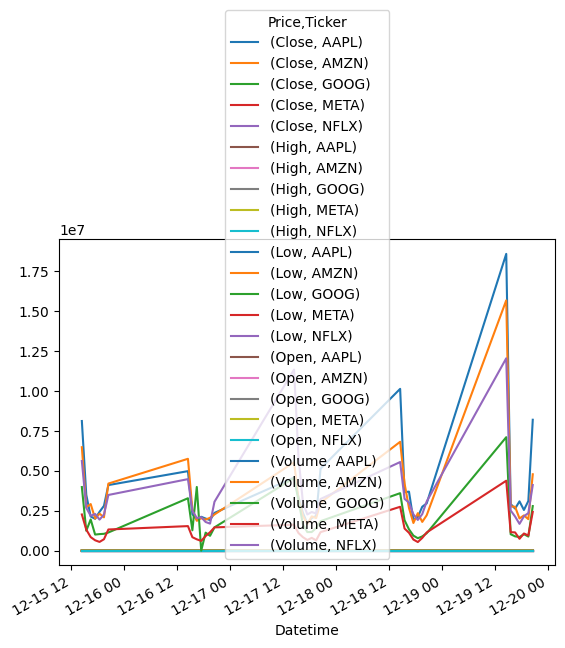

In [17]:
# Call plot() with no arguments for testing
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df.plot()

In [18]:
# show the columns of the dataframe
# The df has multi-level columns (multi-index)
df.columns 

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [19]:
# Show the closing price for Apple for testing
df[('Close', 'AAPL')]

Datetime
2025-12-15 14:30:00+00:00    274.144989
2025-12-15 15:30:00+00:00    275.510010
2025-12-15 16:30:00+00:00    274.920013
2025-12-15 17:30:00+00:00    274.040009
2025-12-15 18:30:00+00:00    273.369995
2025-12-15 19:30:00+00:00    273.804993
2025-12-15 20:30:00+00:00    274.114990
2025-12-16 14:30:00+00:00    273.170013
2025-12-16 15:30:00+00:00    272.809998
2025-12-16 16:30:00+00:00    273.200012
2025-12-16 17:30:00+00:00    272.130005
2025-12-16 18:30:00+00:00    273.565002
2025-12-16 19:30:00+00:00    274.559998
2025-12-16 20:30:00+00:00    274.470001
2025-12-17 14:30:00+00:00    275.494995
2025-12-17 15:30:00+00:00    273.489990
2025-12-17 16:30:00+00:00    272.869995
2025-12-17 17:30:00+00:00    273.019989
2025-12-17 18:30:00+00:00    273.785004
2025-12-17 19:30:00+00:00    273.650085
2025-12-17 20:30:00+00:00    271.859985
2025-12-18 14:30:00+00:00    270.899994
2025-12-18 15:30:00+00:00    272.299988
2025-12-18 16:30:00+00:00    270.250000
2025-12-18 17:30:00+00:00    27

<Axes: xlabel='Datetime'>

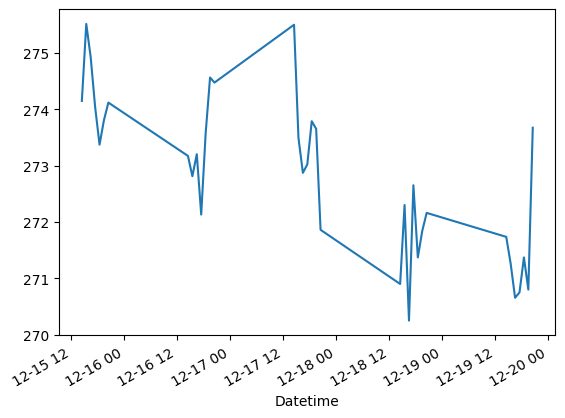

In [20]:
# Plotting the closing price for Apple for testing
df[('Close', 'AAPL')].plot()

<Axes: xlabel='Datetime'>

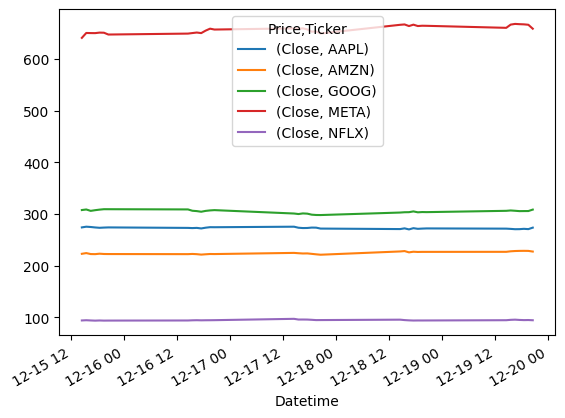

In [21]:
# Closing price for all FAANG stocks
df[[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]].plot()

In [22]:
# Simplify accessing the 'Close' prices without hard-coding the stock names
df['Close']
print(df['Close'].head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Ticker                          NFLX  
Datetime                              
2025-12-15 14:30:00+00:00  94.004997  
2025-12-15 15:30:00+00:00  94.430000  
2025-12-15 16:30:00+00:00  94.000000  


<Axes: xlabel='Datetime'>

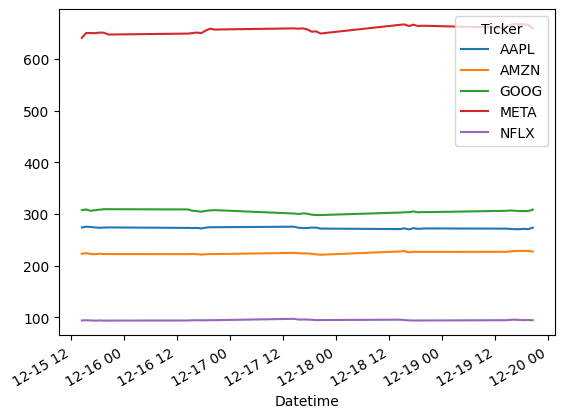

In [23]:
# Plotting the closing prices for all stocks
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['Close'].plot()

### - Creating a timestamp-based title from the filename  

In this section, the date and time information is extracted from the CSV filename. The file extension is first removed, leaving only the timestamp string. This string is then converted into a `datetime` object using `strptime()` and reformatted into a more readable date and time format with `strftime()`. This formatted timestamp can be used as a clear and meaningful title when working with the data. The formatted date and time will be used as the plot's title.   

In [24]:
# Title date based on filename
# Reference: OpenAI
base = latest.replace(".csv", "")
title_date = dt.datetime.strptime(base, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")

### - Plotting and saving the closing price chart  

In this section, a line chart is created to visualise the closing prices over time. The plot size is defined, and a title is added using the formatted date extracted from the filename. Axis labels and a legend are included to make the chart easier to read and interpret.

The plot is then saved as a PNG file using the current date and time as the filename, ensuring that each saved chart is uniquely identified. Finally, the chart is displayed, and the file path of the saved image is printed to confirm that the plot has been successfully created and stored.  

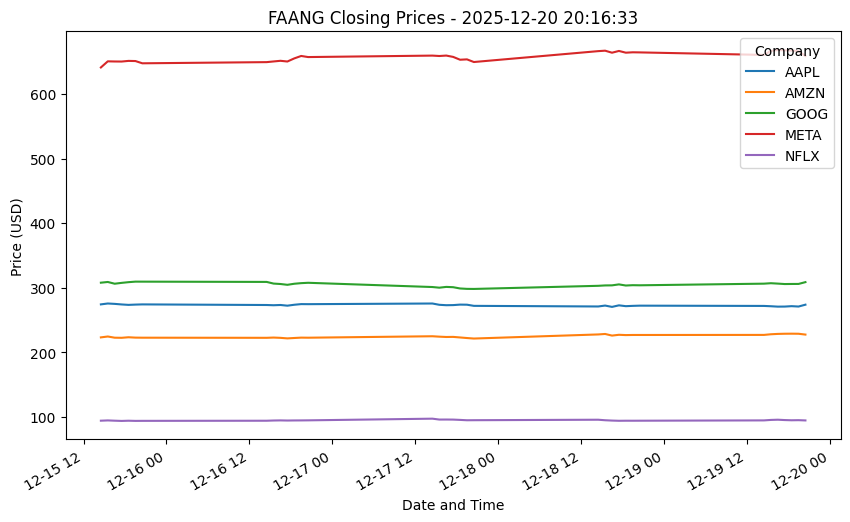

Plot saved as: plots/20251220-201635.png


In [25]:
# Plot
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")

plt.xlabel("Date and Time") # Add the X label
plt.ylabel("Price (USD)") # Add the Y label
plt.legend(title="Company") # Add the legend with title

# Save and show plot
# Ref: OpenAI
plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()

# Confirmation message
# Ref: OpenAI
print(f"Plot saved as: {plot_filename}")

### - Complete Function: `plot_data()`    

Below is the final version of the `plot_data()` function that combines all the steps demonstrated earlier. This function opens the most recent CSV file from the `data` folder, plots the `Close` prices for the five FAANG stocks on a single chart with axis labels, a legend, and the current date as the title. The plot is then saved as a timestamped PNG file in the `plots` folder, and the folder is created automatically if it doesn’t already exist.

Using latest file: data/20251220-201633.csv


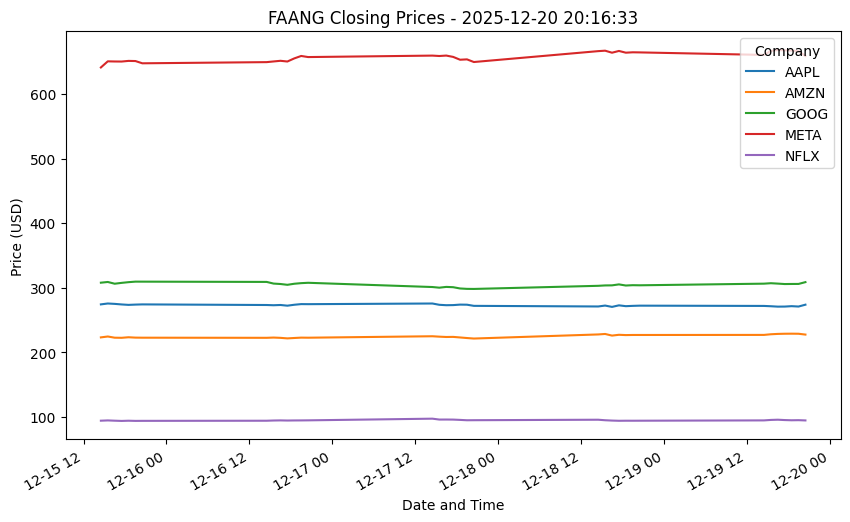

Plot saved as: plots/20251220-201635.png


In [26]:
# Script of the `plot_data()` function
#
# References:
# https://matplotlib.org/stable/gallery/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://docs.python.org/3/library/os.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# OpenAI

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os

def plot_data():
    """
    Opens the latest CSV file in the 'data' folder, plots the 
    closing prices of the FAANG companies, and saves the plot 
    with a timestamped filename in the 'plots' folder.
    """

    # List and sort files
    files = os.listdir("data/")
    files.sort(reverse=True) # Newest file first

    # Latest file (newest timestamp)
    latest = files[0] # Get the latest file
    full_path = os.path.join("data", latest) # Get full path

    print(f"Using latest file: {full_path}")

    # Read the CSV with multi-level columns
    df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

    # Select only Close prices
    close_df = df["Close"]

    # Title date based on filename
    # Reference: OpenAI
    base = latest.replace(".csv", "")
    title_date = dt.datetime.strptime(base, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")

    # Plot
    close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")

    # Save plot
    plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved as: {plot_filename}")

# Example usage
plot_data()


---

## 🔹Problem 3: Script  

---

### - Requirements:  

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

---

### - Creating and running the `faang.py` script  

For this step, the code developed in the previous sections was moved into a standalone Python script called [faang.py](https://github.com/elainecazetta/computer_infrastructure/blob/main/faang.py), which is located in the root of the repository. This allows the full process—downloading the FAANG stock data and generating the closing price plot—to be run directly from the terminal.

A [shebang](https://www.geeksforgeeks.org/python/why-we-write-usr-bin-env-python-on-the-first-line-of-a-python-script/) line was added at the top of the file (#!/usr/bin/env python3) so the operating system knows how to execute the script. The file permissions were then updated to make the script executable using the chmod +x faang.py command.

Once these steps were completed, the script could be run from the terminal using:

```
./faang.py
```

### - Why this is important  

When executed, the script automatically downloads the latest data, creates the plot, saves it to the plots directory, and confirms the filename in the terminal output. This approach makes the process repeatable and removes the need to manually run individual cells in the notebook.

### - Script overview  

The following script combines all the functions developed earlier in the notebook into a single executable Python file. When run from the terminal, it downloads the FAANG stock data, generates a closing price plot, saves the image to the plots directory, and prints the filename of the saved plot. This allows the entire workflow to be executed in one step without manually running individual notebook cells.

/tmp/ipykernel_9469/729668483.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Data saved to data/20251220-201636.csv
Using latest file: data/20251220-201636.csv


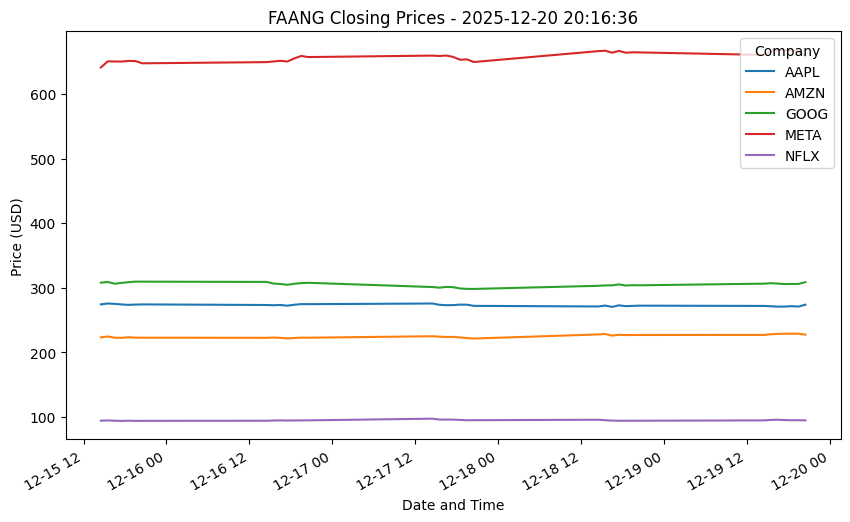

Plot saved as: plots/20251220-201636.png


In [27]:
#! usr/bin/env python

# Ref: https://chatgpt.com/share/693c9149-8a6c-8007-94a1-66c6694c9382

    # -------------------------
    # get_data() script
    # -------------------------

def get_data():
    # References: 
    # https://www.w3schools.com/python/python_functions.asp
    # https://docs.python.org/3/tutorial/controlflow.html#defining-functions
    # https://www.w3schools.com/python/python_functions.asp
    # https://www.geeksforgeeks.org/python/python-def-keyword/
    # OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
        
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
      
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

    # -------------------------
    # plot_data() script
    # -------------------------

def plot_data():
    # References:
    # https://matplotlib.org/stable/gallery/index.html
    # https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    # https://docs.python.org/3/library/os.html
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
    # OpenAI
    """
    Opens the latest CSV file in the 'data' folder, plots the 
    closing prices of the FAANG companies, and saves the plot 
    with a timestamped filename in the 'plots' folder.
    """

    import os
    import pandas as pd
    import datetime as dt
    import matplotlib.pyplot as plt

    # List and sort files
    files = os.listdir("data/")
    files.sort(reverse=True) # Newest file first

    # Latest file
    latest = files[0] # Get the latest file
    full_path = os.path.join("data", latest) # Get full path

    print(f"Using latest file: {full_path}")

    # Read the CSV with multi-level columns
    df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

    # Select only Close prices
    close_df = df["Close"]

    # Title date based on filename
    base = latest.replace(".csv", "")
    title_date = dt.datetime.strptime(base, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")

    # Plot
    close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")

    # Save plot
    plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved as: {plot_filename}")

    # -------------------------
    # Run both
    # -------------------------
get_data()
plot_data()

---

## 🔹Problem 4: Automation  

---

### - Requirements:  

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

---

### - Workflow explanation  

The following GitHub Actions workflow is used to automatically run the faang.py script every Saturday morning. Each section of the workflow is explained below.

### - Workflow name

```yaml
name: Run faang.py and push changes

This line defines the name of the workflow as it appears in the GitHub Actions tab. It helps identify what the workflow does at a glance.

### - Trigger conditions  

```yaml
on:
  workflow_dispatch:
  schedule:
    - cron: "13 01 * * 6"
```

This section defines when the workflow runs.  
`workflow_dispatch` allows the workflow to be triggered manually from GitHub.  
`schedule` uses a cron expression to run the workflow automatically every Saturday at 01:13 UTC.  

### - Permissions  

```yaml
permissions:
  contents: write
```
This grants the workflow permission to write to the repository. It is required so the workflow can commit and push generated plot files back to GitHub.  

### - Jobs definition  

```yaml
jobs:
  run-script:
    runs-on: ubuntu-latest
```
This defines a job called run-script. The job runs on the latest Ubuntu virtual environment provided by GitHub Actions.  

### - Steps: checkout repository  

```yaml
- name: Checkout repository
  uses: actions/checkout@v4
  with:
    persist-credentials: true
```
This step checks out the repository so the workflow has access to the project files. Persisting credentials allows the workflow to push changes back to the repository using the built-in GitHub token.  

### - Steps: set up Python  

```yaml
- name: Set up Python
  uses: actions/setup-python@v5
  with:
    python-version: "3.10"
```
This step installs Python version 3.10 in the workflow environment, ensuring the script runs with a consistent Python version.  

### - Steps: install dependencies  

```yaml
- name: Install dependencies
  run: |
    if [ -f requirements.txt ]; then pip install -r requirements.txt; fi
```
This step installs the required Python libraries listed in requirements.txt. The conditional check prevents errors if the file does not exist.  

### - Steps: run the script  

```yaml
- name: Run faang.py
  run: python faang.py
```
This executes the `faang.py` script, which downloads the data and generates the plot.

### - Steps: commit changes  

```yaml
- name: Commit changes
  run: |
    git config --global user.name "github-actions"
    git config --global user.email "github-actions@github.com"
    git add -A
    git commit -m "Automated update from faang.py" || echo "No changes to commit"
```
This step configures Git user details, stages all changes, and commits them. If there are no changes to commit, the workflow continues without failing.  

### - Steps: push changes  

```yaml
- name: Push changes
  run: git push
```
This step pushes the committed changes back to the GitHub repository.  

### - Why this workflow is useful  

Automating the execution of the script using GitHub Actions ensures the data and plots are kept up to date without manual intervention. Scheduling the workflow also demonstrates how continuous automation can be applied to data analysis tasks using cloud-based infrastructure tools.  

---

### 🔹 Project Conclusion 

This project shows how Python can be used with basic infrastructure tools to automate a simple data analysis task. The work started in a Jupyter Notebook and was then moved into a standalone script that can be run directly from the terminal.

Using GitHub Actions, the script was automated to run on a schedule without any manual steps. This demonstrates how scripting, version control, and automation can be combined to make data tasks more reliable, repeatable, and easier to manage.

---

## End